In [13]:
# Standard libraries
import json
import matplotlib
# pip imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.integrate as integrate
import seaborn as sns
from matplotlib import animation

# non-pip
from potentials import *
from visualization import *
from lattice import *
from il import *
from il_pedagogical import *



initial_pool_size = 50    
output = 'C:\\Users\\Salman\\Desktop\\Research\il-pedagogical\\logs\\results\\morse_potential_{}.json'.format(initial_pool_size)


lattice_size = 200

T = 298.15
cov = 0.00022

displacement_type = 'normal'
disp_kwargs = {'covariance' : [[cov, 0], [0, cov]]}

D_MO = 524.4
r_eq_MO = 1.
a_MO = 1.9

D_M_O = 120.
r_eq_M_O = 1.16
a_M_O = 2.3

E_MA = 160.

empty_fraction = 0.3
OH_fraction = 0.3
siloxane_fraction = 0.4

MO_Morse = {'D' : D_MO, 'a' : a_MO, 'r_eq' : r_eq_MO}
siloxane_Morse = {'D' : D_M_O, 'a' : a_M_O, 'r_eq' : r_eq_M_O}
lattice_fractions = {'empty' : empty_fraction, 'OH' : OH_fraction, 'Siloxane' : siloxane_fraction}

lattice = make_quenched_disorder_lattice(lattice_size, cov, True, False)
decorated_lattice = decorate_lattice(lattice, empty_fraction, OH_fraction, siloxane_fraction)

graftable_sites, competing_sites = locate_grafting_sites(decorated_lattice)
# plot_lattice(decorated_lattice, True, graftable_sites)

local_coordinates = compute_local_coordinates(decorated_lattice, graftable_sites)
local_coordinates = local_coordinates[:,0:3]
local_coordinates_dict = {'OH-OH-distance' : local_coordinates[:, 0],
                            'siloxane-distances' : local_coordinates[:, 1],
                            'OH-siloxane-angle' : local_coordinates[:, 2]}


graft_E, ads_E = grafting_energies(MO_Morse, siloxane_Morse, E_MA, T, graftable_sites, decorated_lattice)
graft_E_non_d = 0.5*graft_E
graft_E = 131.3+0.5*graft_E




-1259.5583908393041 1229.5583908393041 haha


0.25
0.5
0.75
1.0


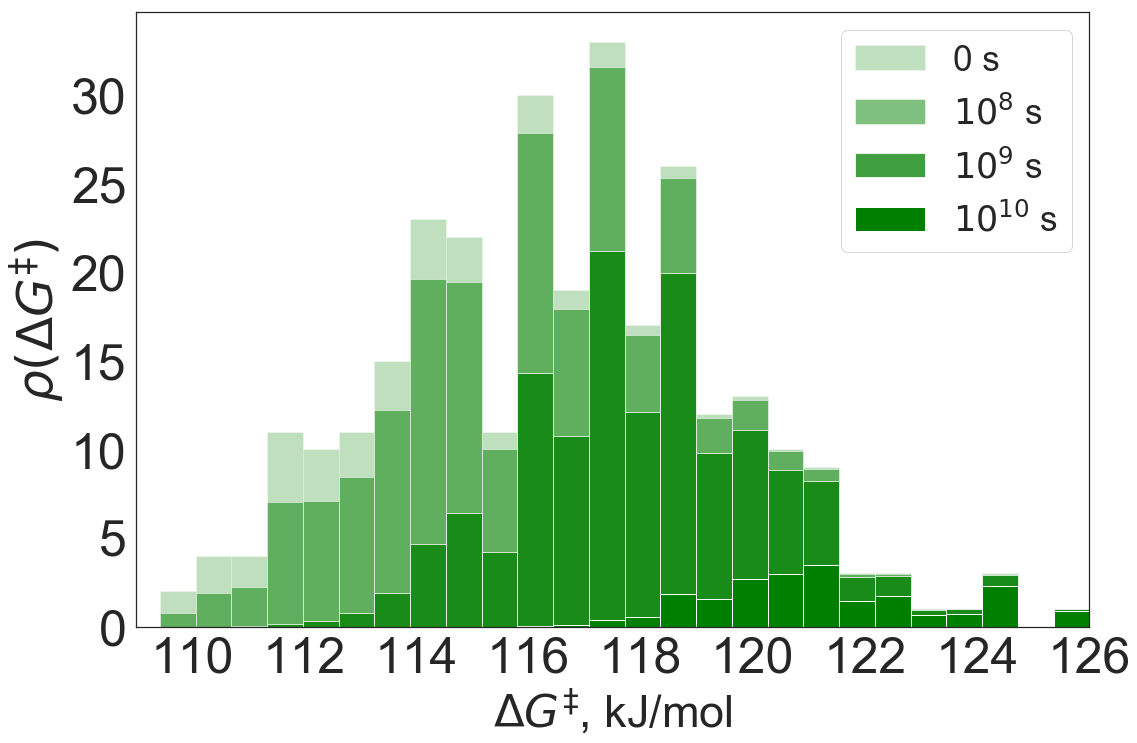

In [14]:
# real time evolution
n_bins = 30
hist_data, bin_edges = np.histogram(graft_E, bins = n_bins)


# n_samples = 300
mid_hist = np.asarray([(bin_edges[i]+bin_edges[i+1])/2 for i in range(np.shape(bin_edges)[0]-1)])
lattice_len = int(np.sqrt(len(graft_E)) + 2)
# sampled_sites = sample_sites(graft_E, n_samples)
# sampled_barrier_heights = graft_E[sampled_sites]
# sampled_local_coordinates = local_coordinates[sampled_sites]
# M, model_barriers_LOO, residuals = train(sampled_local_coordinates, sampled_barrier_heights)
n_sites = np.shape(graft_E)[0]
# model_barrier_heights = predicted_adsorption_energies(sampled_local_coordinates, sampled_barrier_heights, M, local_coordinates, n_sites) 

time = [0, 100000000, 1000000000, 10000000000]
wid = mid_hist[2]-mid_hist[1]
# fig = plt.figure(figsize=(12,12))
plt.figure(figsize=(15,10))
# Full grafting solution ( no training )
for counter, i in enumerate(time):
    h_mod = histogram_graft_mod(hist_data, bin_edges, i, T)
    # plt.hist(h_mod,stacked=True, fill=False)
#     plt.bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), color = 'green')
    print(1.0*(counter+1)/len(time))
    if i != 0:
        plt.bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  r'$10^{%i}$ s' % int(np.log10(i)), color = 'green')
    elif i == 0:
        plt.bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "0 s", color = 'green')
plt.legend(prop={'size': 35})
plt.xlabel(r'$\Delta G^{\ddag}$, kJ/mol',fontsize = 45)
plt.ylabel(r'$\rho(\Delta G^{\ddag})$',fontsize = 50)
plt.xlim(109, 126) 
plt.tight_layout()
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()


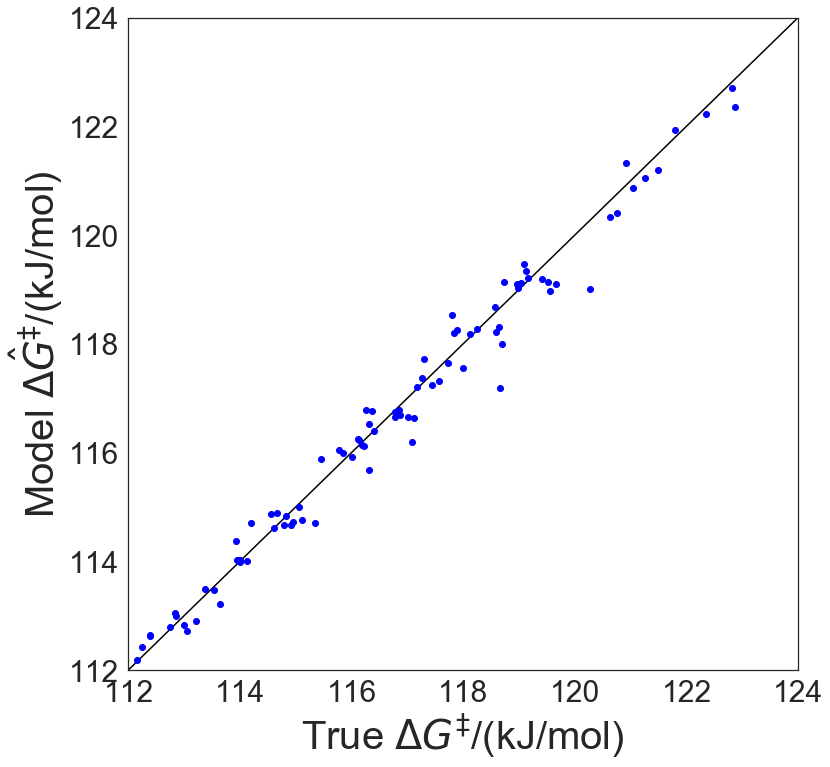

In [15]:
fig = plt.figure(figsize=(12,12))

n_samples = [25, 100, 200, 400]


sampled_sites = sample_sites(graft_E, 200)
sampled_heights = graft_E[sampled_sites]
sampled_coordinates = local_coordinates[sampled_sites]
# sampled_coordinates = np.concatenate((sampled_coordinates[0:1000,0:2],sampled_coordinates[0:1000,3:4]),axis=1)

sampled_barrier_heights = sampled_heights[0:100]
sampled_local_coordinates = sampled_coordinates[0:100]
ax = fig.add_subplot(1, 1, 1)

M, model_barriers_LOO, residuals = train(sampled_local_coordinates, sampled_barrier_heights)
plot_trained(ax, model_barriers_LOO, sampled_barrier_heights, 2.5, 100)
ax.set_xlabel(r'True $\Delta G^{\ddag}$/(kJ/mol)', fontsize = 40)
ax.set_ylabel(r'Model $\Delta \^G^{\ddag}$/(kJ/mol)', fontsize = 40)
ax.tick_params(axis = "x", labelsize = 30)
ax.tick_params(axis = "y", labelsize = 30)

ax.set_xlim([112,124])
ax.set_ylim([112,124])
plt.show()


(100, 3)
(100,)
[[ 7.76077801e+04  7.78964878e+04 -1.60285605e+01]
 [ 7.78964878e+04  8.28391730e+04 -3.60265855e+01]
 [-1.60285605e+01 -3.60265855e+01  8.87494826e-02]]
(297, 3)


c:\users\salman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


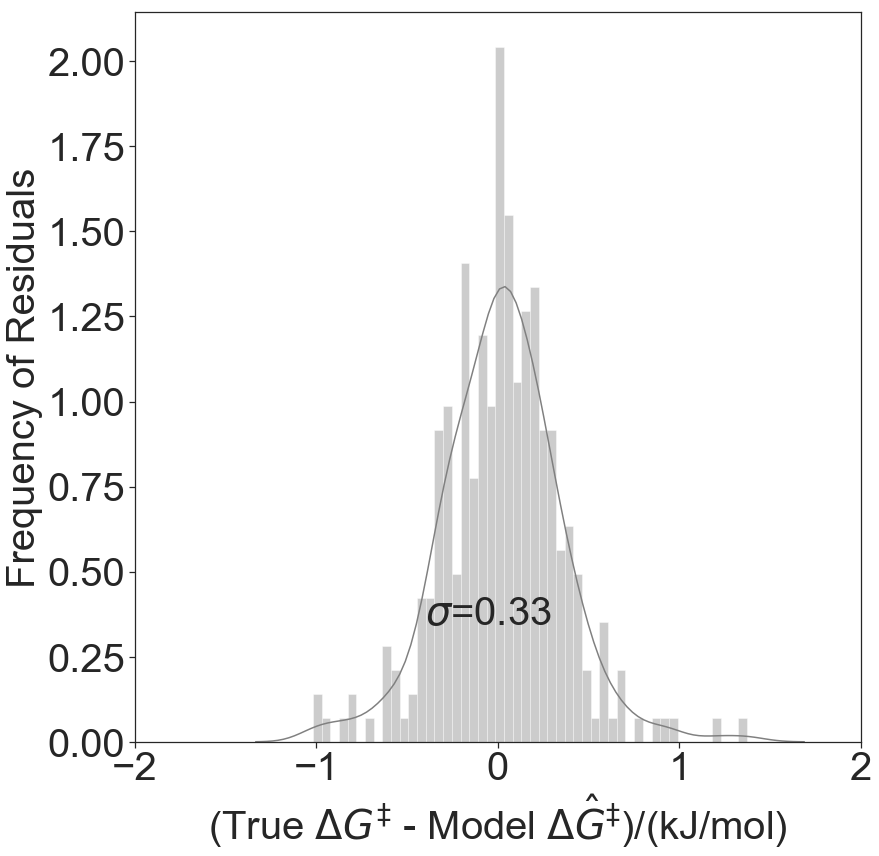

In [16]:
fig = plt.figure(figsize=(12,12))

l = 100

sampled_barrier_heights = sampled_heights[0:l]
sampled_local_coordinates = sampled_coordinates[0:l]
ax = fig.add_subplot(1, 1, 1)
M, model_barriers_LOO, residuals = train(sampled_local_coordinates, sampled_barrier_heights)
print(np.shape(sampled_local_coordinates))
print(np.shape(sampled_barrier_heights))
print(M)
print(np.shape(local_coordinates))
model_barrier_heights = predicted_adsorption_energies(sampled_local_coordinates, sampled_barrier_heights, M, local_coordinates,np.shape(graft_E)[0]) 


residuals = graft_E - model_barrier_heights
sns.distplot(residuals, bins=50, color="grey")
ax.set_xlabel(r'(True ${\Delta}G^{\ddag}$ - Model ${\Delta}\^G^{\ddag}$)/(kJ/mol)', fontsize = 40)
ax.set_ylabel('Frequency of Residuals', fontsize = 40)
ax.tick_params(axis = "x", labelsize = 40)
ax.tick_params(axis = "y", labelsize = 40)
ax.set_xlim([-2,2])


textstr = '$\sigma$='+str(round(np.sqrt(np.var(graft_E-model_barrier_heights)),2))


# $\sigma$/(kJ/mol)"+"\n"+"="  + "\n" + str(round(np.sqrt(np.var(graft_E-model_barrier_heights)),2))
props = dict(boxstyle='round', facecolor='white', alpha=0.0)

ax.text(0.4, 0.2, textstr, transform=ax.transAxes, fontsize=40,
        verticalalignment='top', bbox=props)

ax.tick_params(left='true', bottom='true')
plt.tight_layout()
plt.show()

(297,)
108.15198126021247
127.27897052955248


c:\users\salman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\users\salman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


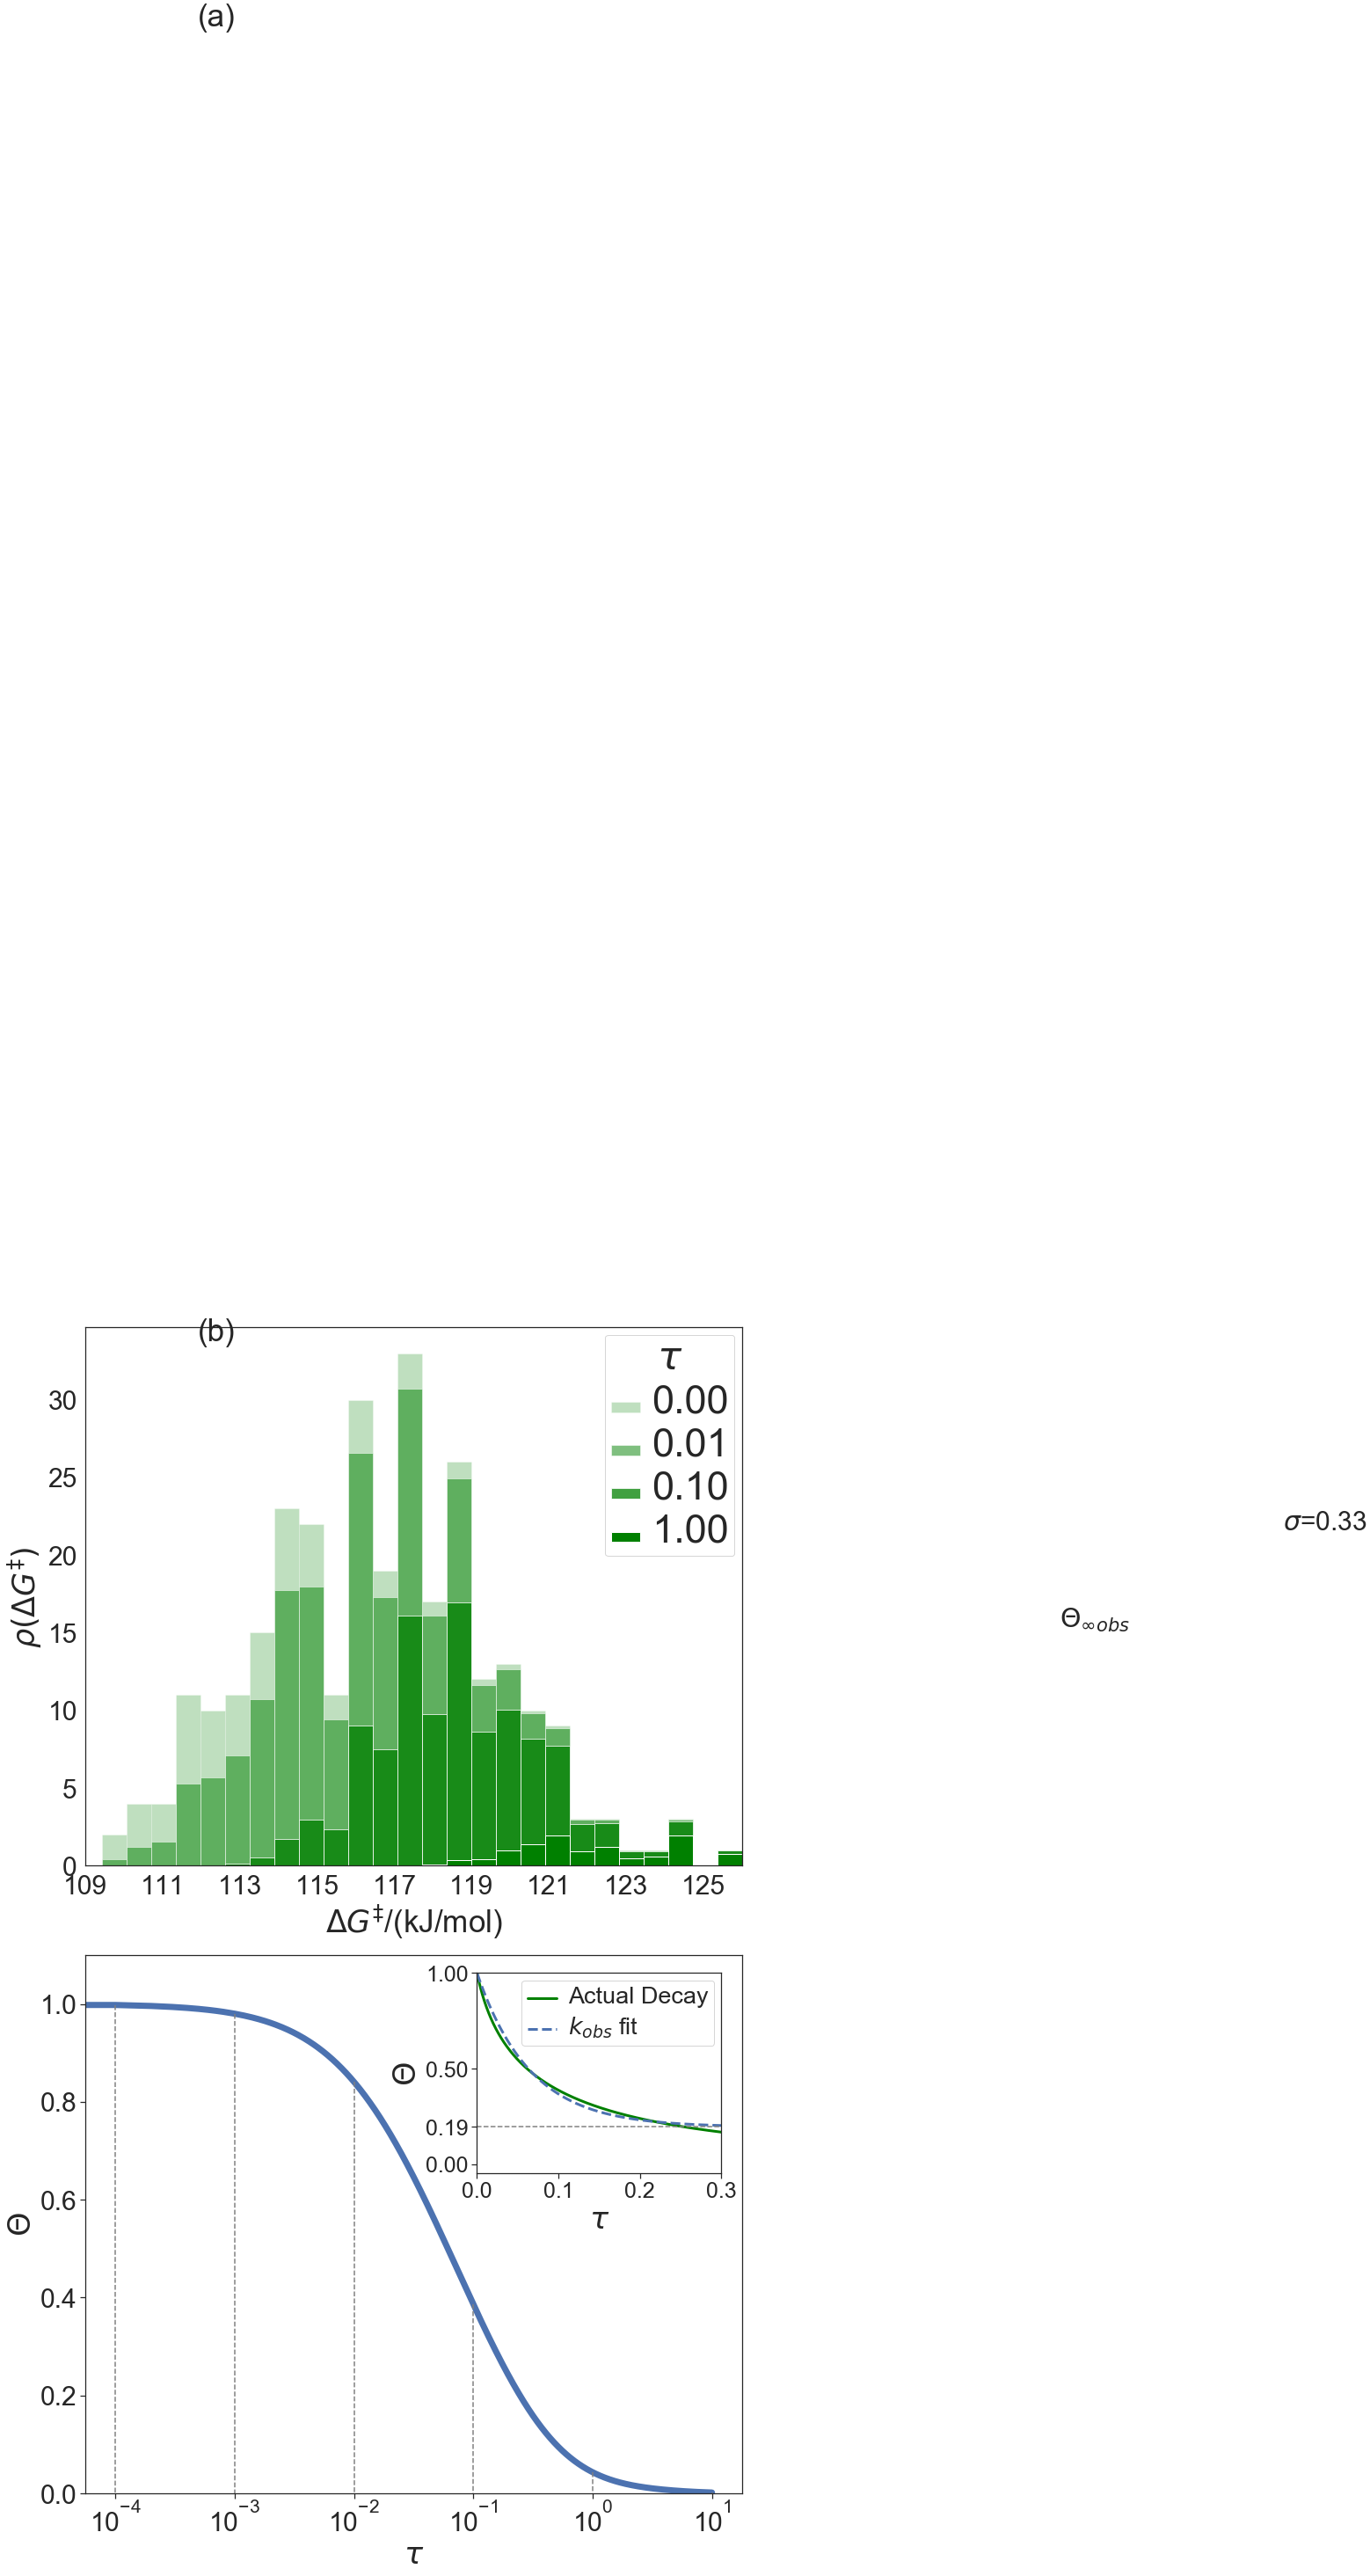

In [17]:
# non-dimensionalized time (CORRECT)
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

fig, axes = plt.subplots(2, 1, figsize=(12, 20))
n_bins = 30
hist_data, bin_edges = np.histogram(graft_E, bins = n_bins)
time = [0, 0.01, 0.1, 1]
hist_data_final = hist_data
bin_edges_final = bin_edges
# n_samples = 300
mid_hist = np.asarray([(bin_edges[i]+bin_edges[i+1])/2 for i in range(np.shape(bin_edges)[0]-1)])
lattice_len = int(np.sqrt(len(graft_E)) + 2)
# sampled_sites = sample_sites(graft_E, n_samples)
# sampled_barrier_heights = graft_E[sampled_sites]
# sampled_local_coordinates = local_coordinates[sampled_sites]
# M, model_barriers_LOO, residuals = train(sampled_local_coordinates, sampled_barrier_heights)
n_sites = np.shape(graft_E)[0]
# model_barrier_heights = predicted_adsorption_energies(sampled_local_coordinates, sampled_barrier_heights, M, local_coordinates, n_sites) 

wid = mid_hist[2] - mid_hist[1]
# fig = plt.figure(figsize=(12,12))
# plt.figure(figsize=(15,10))
# Full grafting solution ( no training )
axes[0].set_xlim((109, 126))
for counter, i in enumerate(time):
    h_mod = histogram_graft_mod_non_dim(hist_data, bin_edges, i, T)
    # plt.hist(h_mod,stacked=True, fill=False)
#     plt.bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), color = 'green')
#     print(1.0*(counter+1)/len(time))
    if counter == 0:
        axes[0].bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "0.00", color = 'green')
    elif counter == 1:
        axes[0].bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "0.01", color = 'green')
    elif counter == 2:
        axes[0].bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "0.10", color = 'green')
    elif counter == 3:
        axes[0].bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "1.00", color = 'green')
# legend = plt.legend(prop={'size': 35}, title = r'$\tau$')
# axes[0].setp(legend.get_title(), fontsize = 35)


# text boxes for a and b markings


textstr1 = "(a)"
textstr2 = "(b)"



props = dict(boxstyle='round', facecolor='white', alpha=0.0)

axes[1].text(0.15,1.80, textstr2, transform=ax.transAxes, fontsize=35,
         verticalalignment='top', bbox=props)

axes[1].text(0.15, 3.85, textstr1, transform=ax.transAxes, fontsize=35,
         verticalalignment='top', bbox=props)


# textstr = "HASJAJSAS"
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# # place a text box in upper left in axes coords
# axes[1].text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)


axes[0].set_xlabel(r'$\Delta G^{\ddag}$/(kJ/mol)',fontsize = 35)
axes[0].set_ylabel(r'$\rho(\Delta G^{\ddag})$',fontsize = 35)
axes[0].set_xlim(109, 126) 
axes[0].xaxis.set_ticks(np.arange(109, 126, 2))
axes[0].tick_params(axis = "x", labelsize = 30)
axes[0].tick_params(axis = "y", labelsize = 30)

# axes[0].xticks(size = 50)
# axes[0].yticks(size = 50)

leg1 = axes[0].legend(title=r'$\tau$')

plt.setp(leg1.get_title(), fontsize = 45)
plt.setp(leg1.get_texts(), fontsize = 45)
print(np.shape(graft_E))
print(np.min(graft_E))
print(np.max(graft_E))

time = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
time = np.linspace(0,10,100000)
left_silanols = np.zeros(np.shape(time)[0])



for counter, i in enumerate(time):
    left_silanols[counter]= np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, i, T))/(np.shape(graft_E)[0])

    
axes[1].set_xlabel(r'$\tau$',fontsize = 35)
axes[1].set_ylabel(r"$\Theta$",fontsize = 35)


axes[1].plot(time, left_silanols, linewidth = 7.0)

axes[1].set_xscale('log')

axes[1].tick_params(axis = "x", labelsize = 30)
axes[1].tick_params(axis = "y", labelsize = 30)



# adding grid lines

axes[1].plot([0.0001, 0.0001],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 0.0001, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([0.001, 0.001],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 0.001, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([0.01, 0.01],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 0.01, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([0.1, 0.1],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 0.1, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([1, 1],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 1, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([10.0, 10.0],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 10.0, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
#              0.001, 0.01, 0.1, 1.0 ,10.0)
# plt.gca().xaxis.grid(True)


inset_axes = inset_axes(axes[1],
                    width="38%", # width = 30% of parent_bbox
                    height="38%", # height : 1 inch
                    bbox_to_anchor=(0, 0, 0.98, 0.98),
                    bbox_transform=axes[1].transAxes)

# bbox_to_anchor=(.7, .5, .3, .5),
# bbox_transform=axes[1].transAxes
inset_axes.set_xlabel(r'$\tau$',fontsize = 35)
inset_axes.set_ylabel(r"$\Theta$",fontsize = 35)


inset_axes.plot(time, left_silanols, linewidth = 3.0, color='green', label = 'Actual Decay')

inset_axes.tick_params(axis = "x", labelsize = 25)
inset_axes.tick_params(axis = "y", labelsize = 25)





inset_axes.tick_params(bottom='true', left='true')
axes[1].tick_params(left='true', bottom='true')
#set axes limits
axes[1].set_ylim([0, 1])

inset_axes.set_ylim([-0.05, 1])
inset_axes.set_xlim([0.0, 0.3])


#fit to exponential

def exponential_decay(time, theta_inf, k_obs):
    return theta_inf + (1-theta_inf)*(np.exp(-k_obs*time))

init_vals = [0, 0]
time_fit = np.linspace(0, 0.3, 10000)
left_silanols_fit = np.zeros(np.shape(time_fit)[0])

for counter, i in enumerate(time_fit):
    left_silanols_fit[counter]= np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, i, T))/(np.shape(graft_E)[0])



best_vals, covar = curve_fit(exponential_decay, time_fit, left_silanols_fit, p0=init_vals)
fit_exp_left_silanols=exponential_decay(time_fit, best_vals[0], best_vals[1])
inset_axes.plot(time_fit, fit_exp_left_silanols, linewidth = 3.0, linestyle='dashed', label = r"$k_{obs}$ fit")
leg_inset = plt.legend()
plt.setp(leg_inset.get_texts(), fontsize = 27)



# dashed line plot
inset_axes.plot([0, 0.5],[best_vals[0], best_vals[0]], linestyle='dashed', color='grey')


# text box for finished

# textstr = 'finished?'


# # $\sigma$/(kJ/mol)"+"\n"+"="  + "\n" + str(round(np.sqrt(np.var(graft_E-model_barrier_heights)),2))
# props = dict(boxstyle='round', facecolor='white', alpha=0.0)

inset_axes.text(1.85, 1.5, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)




# text box for theta_inf


textstr = r"$\Theta_{{\infty}obs}$"


# $\sigma$/(kJ/mol)"+"\n"+"="  + "\n" + str(round(np.sqrt(np.var(graft_E-model_barrier_heights)),2))
props = dict(boxstyle='round', facecolor='white', alpha=0.0)

inset_axes.text(1.5, 1.35, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)










# props = dict(boxstyle='round', facecolor='white', alpha=0.0)

# axes[1].text(1.5, 1.36, textstr, transform=ax.transAxes, fontsize=30,
#         verticalalignment='top', bbox=props)

# axes[1].plot([0, 0.5],[best_vals[0], best_vals[0]], linestyle='dashed', color='grey')



# tick positions


tick_positions_x = [0.0, 0.10, 0.20, 0.30]
inset_axes.set_xticks(tick_positions_x)
inset_axes.set_xticklabels([i for i in tick_positions_x])

tick_positions_y = [0.0, 0.5, 1.0, best_vals[0]]
inset_axes.set_yticks(tick_positions_y)
inset_axes.set_yticklabels([i for i in tick_positions_y])
inset_axes.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))

axes[1].set_ylim([0, 1.1])


plt.tight_layout()
plt.show()



# print(np.log10(time))

2


c:\users\salman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\users\salman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


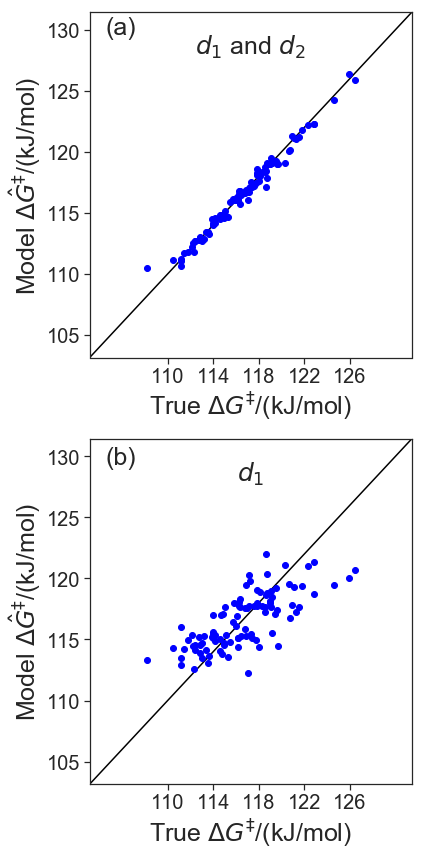

[-3.12154639e-05  4.20934070e-01  5.40658795e-01  9.82155911e-01
  5.58687177e-01  4.32439428e-01  9.83137362e-01]


In [18]:
# coordinate plot (CORRECT)

# 3 plots and r_sq values
titles = [r'$d_1$ and $d_2$', r'$d_1$']

M, model_barriers_LOO, residuals = train(sampled_coordinates[0:100], sampled_barrier_heights[0:100])

model_heights = model_barriers_LOO


sampled_barrier_heights = sampled_heights[0:100]


sampled_local_coordinates = []


# d1, and d2
sampled_local_coordinates.append(sampled_coordinates[0:100,0:2])
# d1
sampled_local_coordinates.append(sampled_coordinates[0:100,0:1])


print(len(sampled_local_coordinates))
# print(sampled_local_coordinates)


R_sq = np.zeros(2)

fig = plt.figure(figsize=(6, 12))
for i in range(2):
    ax = fig.add_subplot(2, 1, i+1)
#     il_morse = ila.Parser('logs/{}'.format(fnames[i]))
#     model_heights = il_morse.model_training_barrier_heights(10)
    textstr = '{}'.format(titles[i])
    props = dict(boxstyle='round', facecolor='white', alpha=0.0)
    ax.text(0.5, 0.9, textstr, transform=ax.transAxes, fontsize=25,
        horizontalalignment='center',verticalalignment='center', bbox=props)
     
    ax.tick_params(left='true', bottom='true')

    M, model_barriers_LOO, residuals = train(np.asarray(sampled_local_coordinates[i]), sampled_barrier_heights)
#     initial_pool = il_morse.sampled_sites(10)
    true_barriers = sampled_barrier_heights
#     plt.title('{}'.format(titles[i]), fontsize = 25)
    
    if i == 0:
        plot_trained(ax, model_barriers_LOO, true_barriers, 2.5, 100, x_lab = False)
    elif i == 1:
        plot_trained(ax, model_barriers_LOO, true_barriers, 2.5, 100)
    elif i == 2:
        plot_trained(ax, model_barriers_LOO, true_barriers, 2.5, 100)
    
    ax.set_xlabel(r'True $\Delta G^{\ddag}$/(kJ/mol)', fontsize = 25)
    ax.set_ylabel(r'Model $\Delta \^G^{\ddag}$/(kJ/mol)', fontsize = 25)
    ax.xaxis.set_ticks(np.arange(110, 130, 4))
    model_barriers_LOO = [float(model_barriers_LOO[i]) for i in range(0,np.shape(model_barriers_LOO)[0])]
    
    # compute R_squared
    SS_res = np.sum(np.square(model_barriers_LOO - true_barriers))
    SS_tot = np.sum(np.square(true_barriers - np.mean(true_barriers)))
    R_sq[i] = 1-SS_res/SS_tot
    
    
# text boxes for a and b markings


textstr1 = "(a)"
textstr2 = "(b)"



props = dict(boxstyle='round', facecolor='white', alpha=0.0)

ax.text(0.05, 0.98, textstr2, transform=ax.transAxes, fontsize=25,
         verticalalignment='top', bbox=props)

ax.text(0.05, 2.225, textstr1, transform=ax.transAxes, fontsize=25,
         verticalalignment='top', bbox=props)


plt.tight_layout()
plt.show()





R_sq = np.zeros(7)

sampled_local_coordinates = []



# theta
sampled_local_coordinates.append(sampled_coordinates[0:100,2:3])
# d2
sampled_local_coordinates.append(sampled_coordinates[0:100,1:2])
# d1
sampled_local_coordinates.append(sampled_coordinates[0:100,0:1])
# d1, and d2
sampled_local_coordinates.append(sampled_coordinates[0:100,0:2])
# d1, and theta
sampled_local_coordinates.append(np.concatenate((sampled_coordinates[0:100,0:1],sampled_coordinates[0:100,2:3]),axis=1))
# d2, and theta
sampled_local_coordinates.append(sampled_coordinates[0:100,1:3])
# d1, d2, and theta
sampled_local_coordinates.append(sampled_coordinates[0:100,0:3])



for i in range(7):
    M, model_barriers_LOO, residuals = train(np.asarray(sampled_local_coordinates[i]), sampled_barrier_heights)
    true_barriers = sampled_barrier_heights
    
    model_barriers_LOO = [float(model_barriers_LOO[i]) for i in range(0,np.shape(model_barriers_LOO)[0])]

    # compute R_squared
    SS_res = np.sum(np.square(model_barriers_LOO - true_barriers))
    SS_tot = np.sum(np.square(true_barriers - np.mean(true_barriers)))
    R_sq[i] = 1-SS_res/SS_tot

print(R_sq)


c:\users\salman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


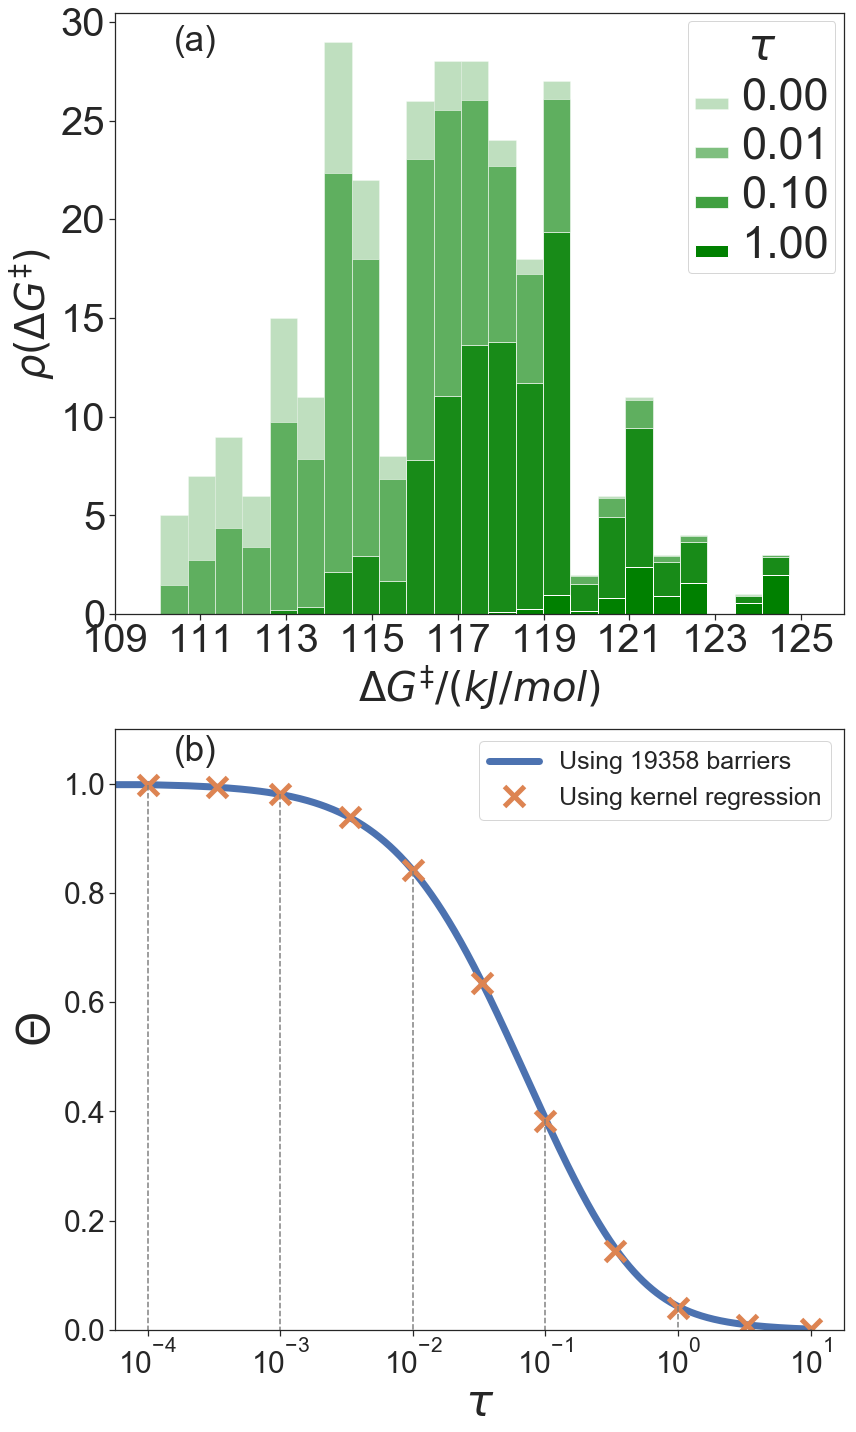

In [19]:
# time evolving population as a function of training set size (CORRECT)
fig, axes = plt.subplots(2, 1, figsize=(12, 20))
time = [0, 0.01, 0.1, 1]

# true distribution
n_bins = 30


tot_sam = 100

M, model_barriers_LOO, residuals = train(sampled_coordinates[0:tot_sam,0:2], sampled_heights[0:tot_sam])
model_heights = predicted_adsorption_energies(sampled_coordinates[0:tot_sam,0:2], sampled_heights[0:tot_sam], M, local_coordinates[:,0:2],np.shape(graft_E)[0]) 

hist_data_predicted, bin_edges_predicted = np.histogram(model_heights, bins = bin_edges_final)
mid_hist_predicted = np.asarray([(bin_edges_predicted[i]+bin_edges_predicted[i+1])/2 for i in range(np.shape(bin_edges)[0]-1)])
wid = mid_hist_predicted[2]-mid_hist_predicted[1]


# bin edges copied from full solution

mid_hist_final = np.asarray([(bin_edges_final[i]+bin_edges_final[i+1])/2 for i in range(np.shape(bin_edges_final)[0]-1)])
wid_final = mid_hist_final[2]-mid_hist_final[1]


# Add text describing the training set size
# axes[0].annotate('    True \n' + 'Population\n' +' Evolution',(106.5, 1500), size = 30)

axes[0].set_xlim((109, 126))
axes[0].set_ylabel(r'$\rho(\Delta G^{\ddag})$', fontsize = 40)
axes[0].set_xlabel(r'$\Delta G^{\ddag}/(kJ/mol)$', fontsize = 40)
axes[0].tick_params(axis = "x", labelsize = 30)
axes[0].tick_params(axis = "y", labelsize = 30)
axes[0].xaxis.set_ticks(np.arange(109, 126, 2))
axes[0].tick_params(left='true', bottom='true')

for counter, i in enumerate(time):
    h_mod = histogram_graft_mod_non_dim(hist_data_predicted, bin_edges_final, i, T)   
    if counter == 0:
        axes[0].bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "0.00", color = 'green')
    elif counter == 1:
        axes[0].bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "0.01", color = 'green')
    elif counter == 2:
        axes[0].bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "0.10", color = 'green')
    elif counter == 3:
        axes[0].bar(mid_hist, height = h_mod, width = wid, alpha = 1.0*(counter+1)/len(time), label =  "1.00", color = 'green')
        
        
axes[0].tick_params(axis = "x", labelsize = 40)
axes[0].tick_params(axis = "y", labelsize = 40)
        
leg1 = axes[0].legend(title=r'$\tau$')

plt.setp(leg1.get_title(), fontsize = 45)
plt.setp(leg1.get_texts(), fontsize = 45)




time = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
time = np.linspace(0,10,100000)
time_pred = np.geomspace(0.00001,10,20)
time_pred = [0.0001, 0.0003333, 0.001, 0.003333, 0.01, 0.03333, 0.1, 0.3333, 1.0, 3.333, 10.0]
left_silanols_predicted = np.zeros(np.shape(time_pred)[0])



for counter, i in enumerate(time_pred):
    left_silanols_predicted[counter]= np.sum(histogram_graft_mod_non_dim(hist_data_predicted, bin_edges, i, T))/(np.shape(graft_E)[0])

    
textstr1 = "(a)"
textstr2 = "(b)"



props = dict(boxstyle='round', facecolor='white', alpha=0.0)

axes[1].text(0.25,1.80, textstr2, transform=ax.transAxes, fontsize=35,
         verticalalignment='top', bbox=props)

axes[1].text(0.25, 3.86, textstr1, transform=ax.transAxes, fontsize=35,
         verticalalignment='top', bbox=props)

    

axes[1].plot(time, left_silanols, label = 'Using 19358 barriers', linewidth = 7.0)
axes[1].plot(time_pred, left_silanols_predicted, 'x', label = 'Using kernel regression', markersize=20, markeredgewidth=5)
leg = plt.legend()


axes[1].set_xlabel(r'$\tau$',fontsize = 45)
axes[1].set_ylabel(r"$\Theta$",fontsize = 45)




axes[1].set_xscale('log')

axes[1].tick_params(axis = "x", labelsize = 30)
axes[1].tick_params(axis = "y", labelsize = 30)

# adding grid lines

axes[1].plot([0.0001, 0.0001],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 0.0001, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([0.001, 0.001],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 0.001, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([0.01, 0.01],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 0.01, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([0.1, 0.1],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 0.1, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([1, 1],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 1, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')
axes[1].plot([10.0, 10.0],[np.sum(histogram_graft_mod_non_dim(hist_data, bin_edges, 10.0, T))/(np.shape(graft_E)[0]), 0.0], color='grey', linestyle = 'dashed')

axes[1].tick_params(left='true', bottom='true')


axes[1].tick_params(left='true')
axes[1].set_ylim([0, 1.1])

plt.tight_layout()
axes[1].legend( prop={'size':  25})
plt.show()


100


c:\users\salman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


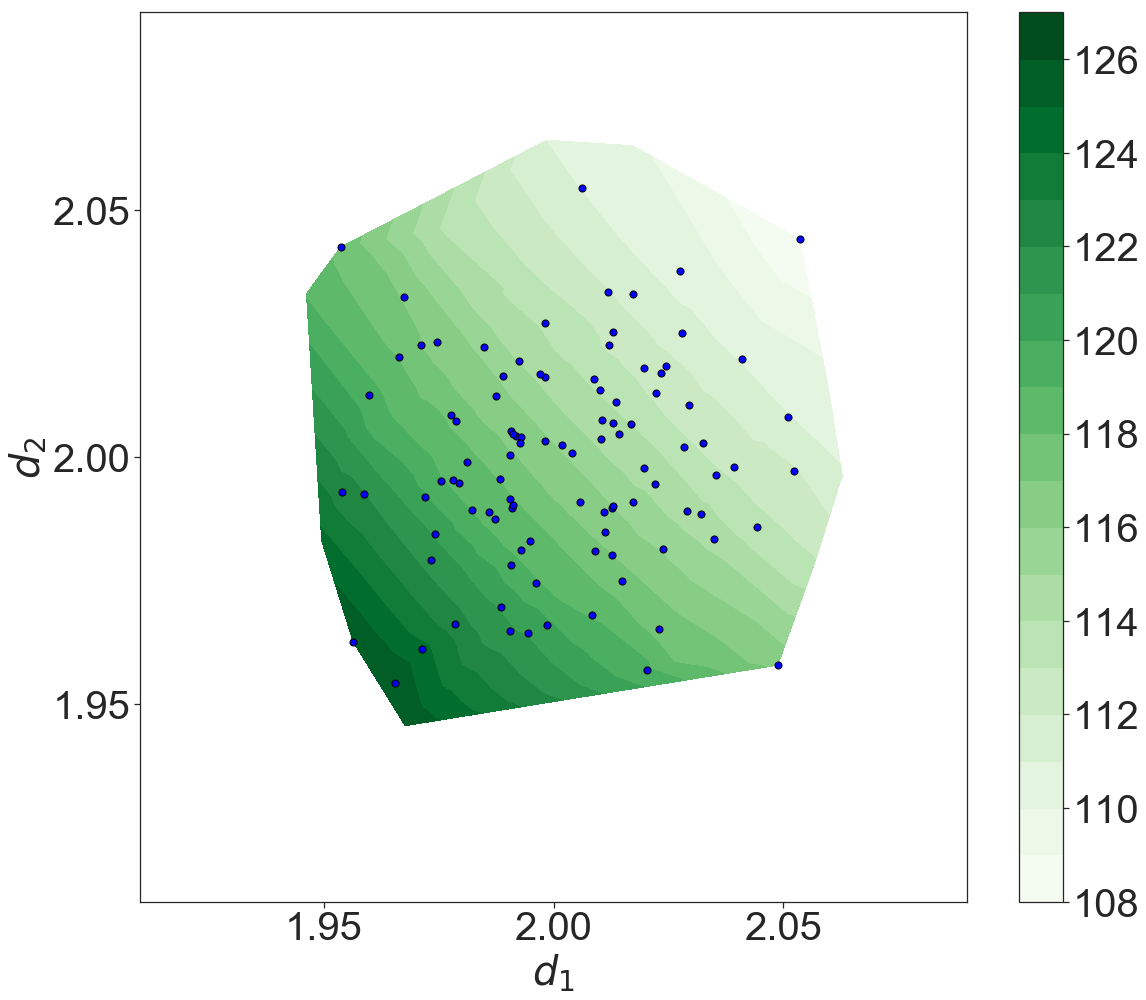

In [20]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1, 1, figsize=(16.5, 14), sharey=True)
local_coordinates = local_coordinates
true_barriers = graft_E
print(len(sampled_barrier_heights))
tot_sam = 100

M, model_barriers_LOO, residuals = train(sampled_coordinates[0:tot_sam,0:2], sampled_heights[0:tot_sam])
model_heights = predicted_adsorption_energies(sampled_coordinates[0:tot_sam,0:2], sampled_heights[0:tot_sam], M, local_coordinates[:,0:2],np.shape(graft_E)[0]) 

# sampled_barrier_heights = sampled_heights[0:26]
# sampled_coordinates = sampled_coordinates[0:26]

sampled_local_coordinates = sampled_coordinates

initial_pool = n_samples

initial_pool_barriers = model_barriers_LOO
v = np.linspace(min(true_barriers), max(true_barriers), 20, endpoint=True)

# axs.set_title('True Barriers', fontsize='30')
# tri1 = axs[0].tricontourf(local_coordinates[:,0], local_coordinates[:, 1], true_barriers, 20, 
# #                 vmin=np.min(true_barriers), vmax=np.max(true_barriers))
# tri1 = axs.tricontourf(local_coordinates[:,0], local_coordinates[:, 1], true_barriers, v, cmap=cm.Greens)
# axs.set_xlabel(r'$d_1$ (OH-OH distance)', fontsize='30')
# axs.set_ylabel(r'$d_2$ (Siloxane-Siloxane distance)', fontsize='30')
# axs.tick_params(labelsize='20')
# cb1 = fig.colorbar(tri1, ax=axs)
# cb1.ax.tick_params(labelsize=20)


# axs.set_title('Model Predicted Barriers',fontsize='30')
tri2 = axs.tricontourf(local_coordinates[:,0], local_coordinates[:, 1], model_heights,v, cmap=cm.Greens)
axs.scatter(sampled_local_coordinates[0:tot_sam,0], sampled_local_coordinates[0:tot_sam,1], s=50, c='blue', edgecolors='black', label='Initial Pool')
# axs[1].scatter(sampled_local_coordinates[50:,0], sampled_local_coordinates[50:,1], s=50, c='w', edgecolors='black', label='Importance Sampled')
axs.set_xlabel(r'$d_1$',fontsize='40')
axs.set_ylabel(r'$d_2$',fontsize='40')
axs.tick_params(labelsize='40')
axs.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.legend()
# axs[1].set_ylabel('Siloxane-Siloxane distance')
cb2 = fig.colorbar(tri2, ax=axs, format=ticker.EngFormatter(places=0))
cb2.ax.tick_params(labelsize=40)
# plt.colorbar([tri1, tri2], ax=axes.ravel().tolist())



#tick labels

tick_positions_x = [1.90, 1.95, 2.00, 2.05, 2.10]
axs.set_xticks(tick_positions_x)
axs.set_xticklabels([i for i in tick_positions_x])

tick_positions_y = [1.95, 2.00, 2.05, 2.10]
axs.set_yticks(tick_positions_y)
axs.set_yticklabels([i for i in tick_positions_y])

axs.tick_params(left='true', bottom='true')
axs.tick_params(axis = "x", labelsize=40)
axs.tick_params(axis = "y", labelsize=40)
axs.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs.set_xlim([1.91, 2.09])
axs.set_ylim([1.91, 2.09])
plt.tight_layout()
plt.show()


c:\users\salman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


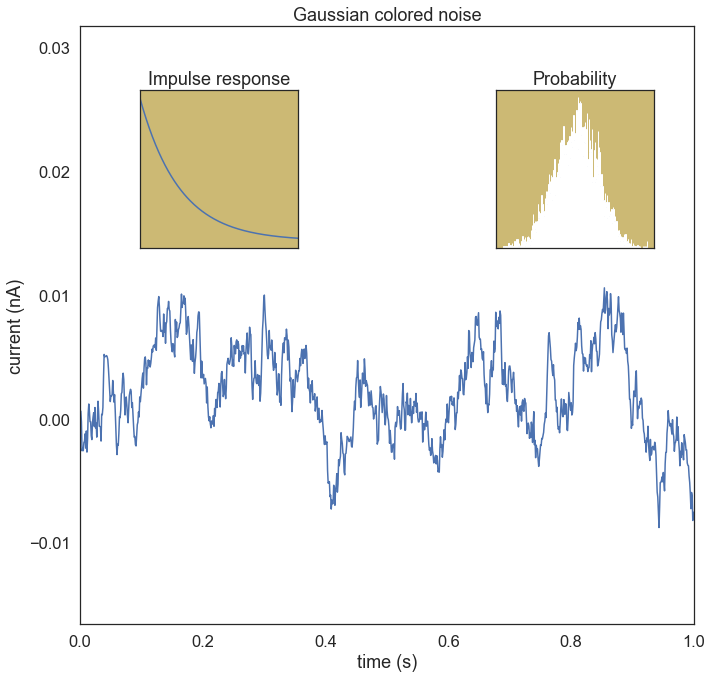

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='y')
n, bins, patches = plt.hist(s, 400, normed=1)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

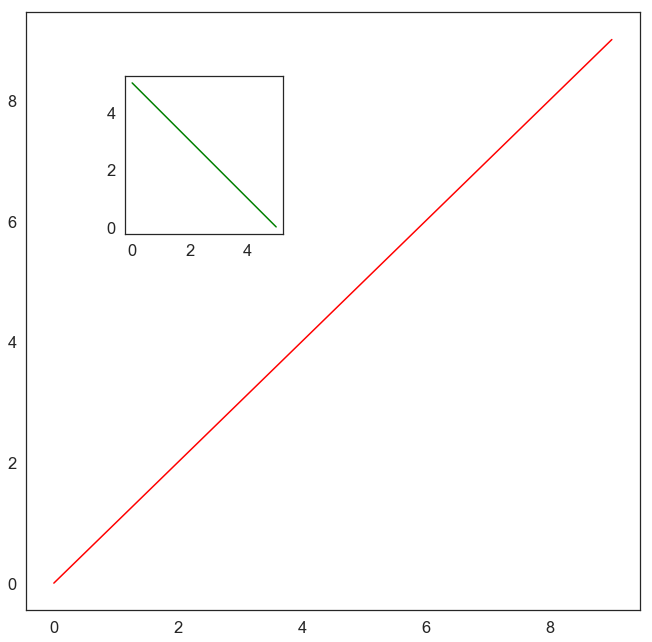

In [22]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(range(10), color='red')
ax2.plot(range(6)[::-1], color='green')

plt.show()

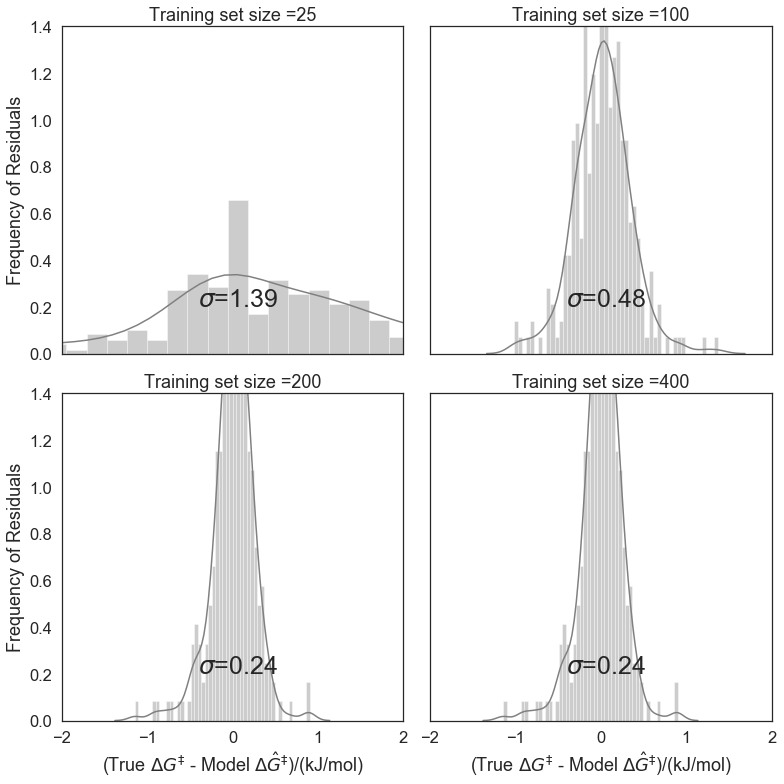

In [23]:
plt.rcParams['figure.figsize'] = 11, 11
fig = plt.figure()


for i, l in enumerate(n_samples):
    
    sampled_barrier_heights = sampled_heights[0:l]
    sampled_local_coordinates = sampled_coordinates[0:l]
    ax = fig.add_subplot(2, 2, i+1)
    M, model_barriers_LOO, residuals = train(sampled_local_coordinates, sampled_barrier_heights)
    model_barrier_heights = predicted_adsorption_energies(sampled_local_coordinates, sampled_barrier_heights, M, local_coordinates,np.shape(graft_E)[0]) 
    
    residuals = graft_E - model_barrier_heights
#     sns.distplot(residuals, bins=40, color="grey",label = "Number of samples = "+str(l)+"\n $\sigma$ =  "+ str(round(np.sqrt(np.var(graft_E-model_barrier_heights)),2)))
#     ax.set_xlabel(r'${\Delta}G_{true}^{\ddag} - {\Delta}G_{model}^{\ddag}$, kJ/mol', fontsize = 20)
#     ax.set_ylabel('Frequency', fontsize = 20)
#     plt.legend(loc='upper right')
#     plt.title('Iteration 0, Initial Pool = {}'.format(ini_pool_size[i]))
    sns.distplot(residuals, bins=50, color="grey")
    
#     , fontsize = 40)
    if i == 0 or i == 2:
        ax.set_ylabel('Frequency of Residuals')
    if i == 2 or i == 3:
        ax.set_xlabel(r'(True ${\Delta}G^{\ddag}$ - Model ${\Delta}\^G^{\ddag}$)/(kJ/mol)')
    
#     , fontsize = 40)
#     ax.tick_params(axis = "x", labelsize = 40)
#     ax.tick_params(axis = "y", labelsize = 40)
    ax.set_xlim([-2,2])
    ax.set_ylim([0,1.4])
   
   
   
    ax.set_title('Training set size ='+str(l))
    
    if i == 0 or i == 1:
        ax.set_xticklabels([])
    if i == 1 or i == 3:
        ax.set_yticklabels([])
    
    if i == 1:
        textstr = '$\sigma$=0.48'
    else:
        textstr = '$\sigma$='+str(round(np.sqrt(np.var(graft_E-model_barrier_heights)),2))


    # $\sigma$/(kJ/mol)"+"\n"+"="  + "\n" + str(round(np.sqrt(np.var(graft_E-model_barrier_heights)),2))
    props = dict(boxstyle='round', facecolor='white', alpha=0.0)

    ax.text(0.4, 0.2, textstr, transform=ax.transAxes, fontsize=25,
            verticalalignment='top', bbox=props)


# fig = plt.figure(figsize=(12,12))

# l = 100

# sampled_barrier_heights = sampled_heights[0:l]
# sampled_local_coordinates = sampled_coordinates[0:l]
# ax = fig.add_subplot(1, 1, 1)
# M, model_barriers_LOO, residuals = train(sampled_local_coordinates, sampled_barrier_heights)
# model_barrier_heights = predicted_adsorption_energies(sampled_local_coordinates, sampled_barrier_heights, M, local_coordinates,np.shape(graft_E)[0]) 


# residuals = graft_E - model_barrier_heights
# sns.distplot(residuals, bins=40, color="grey",label =" $\sigma$/(kJ/mol) =  "+ str(round(np.sqrt(np.var(graft_E-model_barrier_heights)),2)))
# ax.set_xlabel(r'${(\Delta}G^{\ddag}(True) - {\Delta}\^G^{\ddag}$(Model))/(kJ/mol)', fontsize = 40)
# ax.set_ylabel('Frequency of Residuals', fontsize = 40)
# ax.tick_params(axis = "x", labelsize = 40)
# ax.tick_params(axis = "y", labelsize = 40)
# ax.set_xlim([-2,2])
# plt.legend(loc='upper right',prop={'size': 40})

plt.tight_layout()
plt.show()